In [1]:
import astropy.units as u
import numpy as np
from BDFit import StarFit, find_bands, provide_phot
from astropy.table import Table


In [2]:
s = StarFit(libraries=['sonora_bobcat'])

Library path: /nvme/scratch/work/tharvey/brown_dwarfs/models
Warning! F410M found in multiple instruments. Keeping first, which is NIRCam. Provide instrument.band in dictionary to override this.
Total models: 1208


In [3]:
cat_path = '/nvme/scratch/work/tharvey/catalogs/UNCOVER_DR3_LW_SUPER_catalog.fits'

table = Table.read(cat_path)

bands = find_bands(table, flux_wildcard=f'f_*')
bands.remove('alma')

flux, error = provide_phot(bands=bands, flux_wildcard='f_*', error_wildcard='e_*', table=table, flux_unit=u.nJy)

s.fit_catalog(fnu=flux, efnu=error, bands=[band.upper() for band in bands]) 

Warning! Assuming F435W is the same as ACS_WFC.F435W
Warning! Assuming F606W is the same as ACS_WFC.F606W
Warning! Assuming F814W is the same as ACS_WFC.F814W
Warning! Assuming F105W is the same as WFC3_IR.F105W
Warning! Assuming F125W is the same as WFC3_IR.F125W
Warning! Assuming F140W is the same as WFC3_IR.F140W
Warning! Assuming F160W is the same as WFC3_IR.F160W
Warning! Minimum wavelength of library sonora_bobcat is greater than minimum wavelength of bands to fit. 0.40 um > 0.39 um
Clipping bands to fit to the wavelength range of the library.
Fitting with sonora_bobcat libraries with 1208 templates.
Fitting 27 bands: ['ACS_WFC.F435W', 'ACS_WFC.F606W', 'ACS_WFC.F814W', 'F070W', 'F090W', 'WFC3_IR.F105W', 'F115W', 'WFC3_IR.F125W', 'WFC3_IR.F140W', 'F140M', 'F150W', 'WFC3_IR.F160W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W', 'F300M', 'F335M', 'F356W', 'F360M', 'F410M', 'F430M', 'F444W', 'F460M', 'F480M']


/nvme/scratch/work/tharvey/brown_dwarfs/src/BDFit/StarFit.py:1188: RuntimeWarning: invalid value encountered in divide
  star_tnorm = _num/_den
Calculating chi2 for all templates...: 100%|██████████| 1208/1208 [00:25<00:00, 46.58it/s]
/nvme/scratch/work/tharvey/brown_dwarfs/src/BDFit/StarFit.py:1213: RuntimeWarning: All-NaN slice encountered
  star_min_chi2 = np.nanmin(star_chi2, axis=1)
/nvme/scratch/work/tharvey/brown_dwarfs/src/BDFit/StarFit.py:1216: RuntimeWarning: divide by zero encountered in divide
  star_min_chinu = star_min_chi2 / (self.nusefilt - 1)
/nvme/scratch/work/tharvey/brown_dwarfs/src/BDFit/StarFit.py:1216: RuntimeWarning: invalid value encountered in divide
  star_min_chinu = star_min_chi2 / (self.nusefilt - 1)


{'subset': None,
 'star_tnorm': array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [6.05964317e+05, 5.07147837e+05, 4.80008411e+05, ...,
         8.03169248e-03, 8.56930429e-03, 9.07429280e-03],
        [3.32926033e+04, 6.66393156e+04, 8.07557997e+03, ...,
         9.07106266e-05, 8.44414977e-05, 8.40173789e-05],
        [2.50922783e+04, 6.91158183e+04, 6.18757231e+03, ...,
         9.43045776e-05, 8.87718533e-05, 8.77728627e-05]]),
 'star_chi2': array([[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan,        n

1


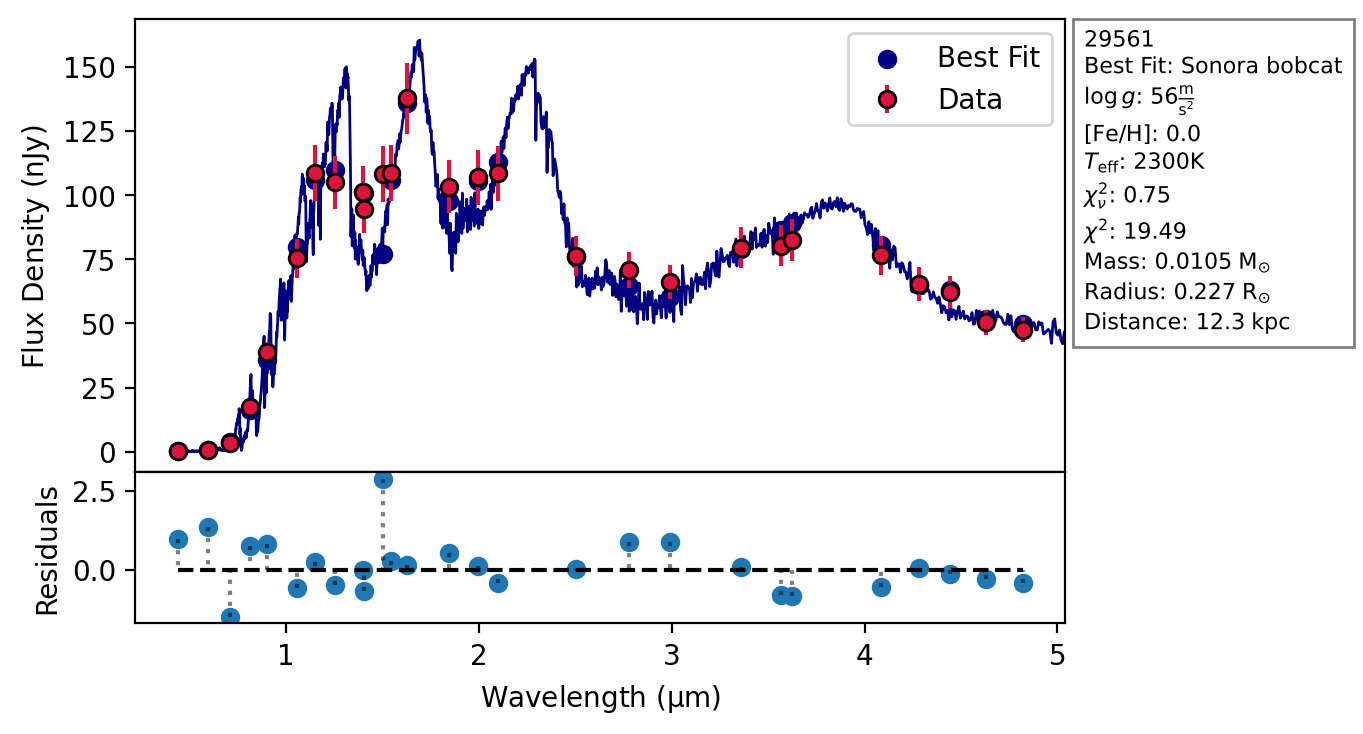

In [4]:
# Reduced chi2 less than 1, S/N in any 3 bands greater than 5, and all 27 filters used

mask = (s.star_min_chinu < 1) & (np.sum(flux.value/error.value > 8, axis=1) > 3) & (s.nusefilt == 27)
ids = np.arange(len(s.star_min_chinu))[mask]
print(len(ids))
for i in ids:
    s.plot_fit(idx=i)


/nvme/scratch/work/tharvey/brown_dwarfs/src/BDFit/StarFit.py:2071: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if idxs == 'all':


TypeError: Coordinate frame Galactocentric got unexpected keywords: ['x_sun']

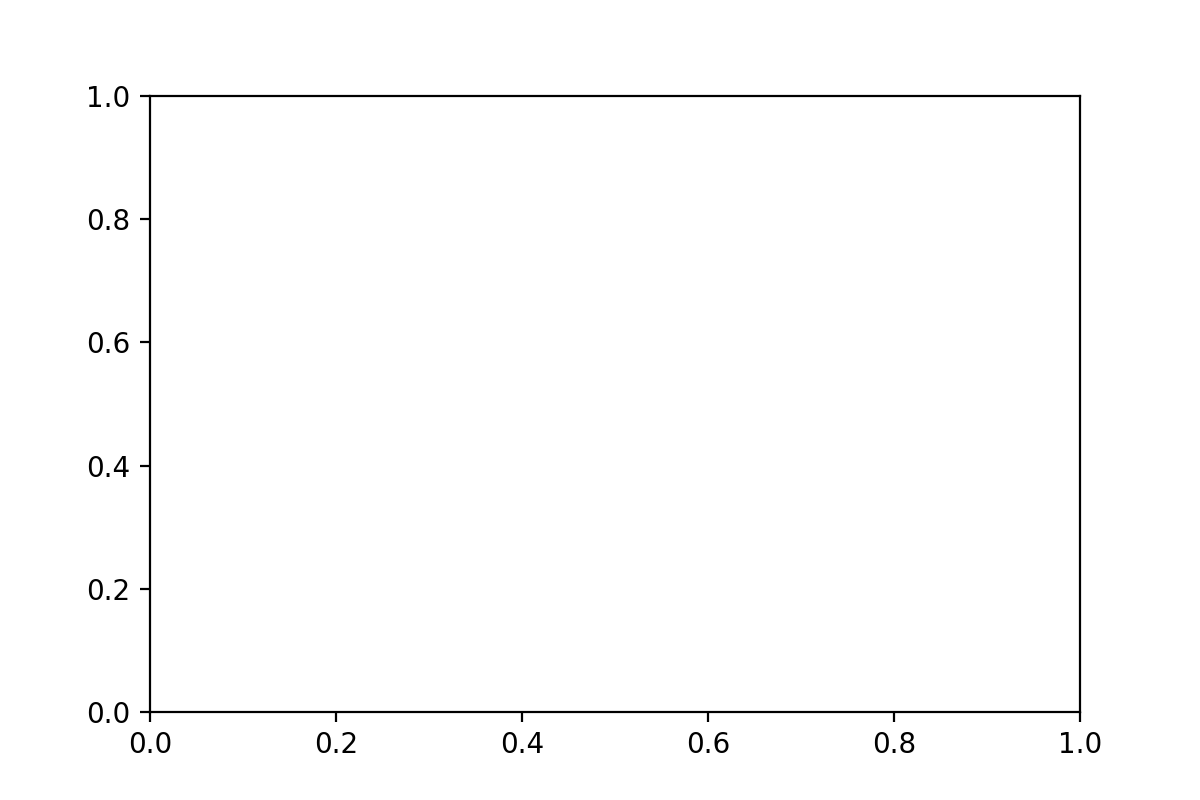

In [5]:
%matplotlib ipympl

ras = table['ra'][mask]
decs = table['dec'][mask]

s.plot_brown_dwarf_locations(idxs=ids, ra=ras, dec=decs, coord_system='galactocentric', plot_3d=False)